In [90]:
import numpy as np
import h5py
import Analysis
from copy import deepcopy

def AddFitMetadata(path, h5_path, A, extra_dict=None):
        h5 = h5py.File(path)
        
        try: 
            h5.create_group(h5_path)
        except:
            del h5[h5_path]
            h5.create_group(h5_path)
            

        fa = h5[h5_path].attrs
        fit = A.SaveFit()

        for key, val in fit.items():
            if key not in ['Data', 'energies', 'loglike', 'PSC']:
                fa.create('flux_'+key,val['flux'])
                fa.create('fluxunc_'+key,val['fluxunc'])        

        fa.create('loglike_total',np.sum(A.loglike))
        fa.create('loglike',A.loglike)
        fa.create('energies',A.central_energies)
        fa.create('bins', A.bin_edges)
        fa.create('irf', A.irf)
        fa.create('evclass', A.evclass)
        fa.create('convtype', A.convtype)
        fa.create('phfile', A.phfile)
        fa.create('tag', A.tag)

        if extra_dict is not None:
            for key, val in extra_dict.items():
                if key == 'residual':
                    try:
                        del h5[h5_path+'/residual']
                    except: 
                        pass

                    h5.create_dataset(h5_path+'/residual', data=val, dtype='float32')
                    print 'Saving new residual... Shape = ', val.shape
                else:
                    fa.create(key, val)
        h5.close()

def LoadModel(basedir, galprop_tag):
    # Load various diffuse models and run fits.
    print 'Running Analysis for model', galprop_tag
    #A = Analysis.Analysis(tag='P7REP_CLEAN_V15_calore', basepath='/data/GCE_sys/')
    A = Analysis.Analysis(tag='P8R2_CLEAN_V6_calore', basepath='/data/GCE_sys/')
    

    A.GenSquareMask(l_range=[-20.,20.], b_range=[-20.,20.], plane_mask=2.)
    A.BinPhotons(infile='binned_photons_'+A.tag+'.npy')
    # Load 2FGL 
    
    
    A.AddPointSourceTemplate(fixNorm=True,pscmap='PSC_' + A.tag + '_fgl3_with_ext.npy')
    A.CalculatePixelWeights(diffuse_model='fermi_diffuse_'+A.tag+'.npy',psc_model='PSC_' + A.tag + '_fgl3_with_ext.npy',
                        alpha_psc=5., f_psc=0.1)
    
    
    
#     A.AddPointSourceTemplate(fixNorm=True,pscmap='PSC_3FGL_with_ext.npy')
#     A.CalculatePixelWeights(diffuse_model='fermi_diffuse_'+A.tag+'.npy',psc_model='PSC_3FGL_with_ext.npy',
#                         alpha_psc=5., f_psc=0.1)
    
    A.AddIsotropicTemplate(fixNorm=False, fixSpectrum=False) # External chi^2 used to fix normalization within uncertainties
    
    A.AddFermiBubbleTemplate(template_file='./bubble_templates_diskcut30.0.fits', 
                         spec_file='./reduced_bubble_spec_apj_793_64.dat', fixSpectrum=False, fixNorm=False)
    
    
    A.AddHDF5Template(hdf5file=basedir +'/'+ galprop_tag+'.hdf5',verbosity=1, multiplier=2., bremsfrac=1.25, 
                  E_subsample=2, fixSpectrum=False, separate_ics=False)
    return A



In [91]:
A = LoadModel('/data/GCE_sys/mod_c','Mod_A_2D_MS04_XCO')
#'./mod_c/Mod'


Running Analysis for model Mod_A_2D_MS04_XCO
Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...


In [92]:

A.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.25, 
               r_s=20.0, axesratio=1, offset=(0, 0), spec_file=None,)


array([  8.28584320e-16,   0.00000000e+00,   0.00000000e+00, ...,
         0.00000000e+00,   0.00000000e+00,   8.28584320e-16])

In [93]:
A.ResetFit()    
A.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]


Masking completed in 1.0296e+00 s
Write likelihood tempfile to  /tmp/tmpvyDhm1
Code generation completed in 1.0641e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -6.584975
            PSC = +1.000000
    Pi0_Brems_0 = +0.395823
    Isotropic_0 = -4.458462
          ICS_0 = +0.216196
      Bubbles_0 = -8.070587

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -6.964223
            PSC = +1.000000
    Pi0_Brems_0 = +0.365614
    Isotropic_0 = -4.731386
          ICS_0 = +0.177005
      Bubbles_0 = -8.524116

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -6.983186
            PSC = +1.000000
    Pi0_Brems_0 = +0.364104
    Isotropic_0 = -4.745032
          ICS_0 = +0.175046
      Bubbles_0 = -8.546793

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -602470.257484 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 0.000809885445696 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_0,1.379461e+00,1.095433e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_0,7.932857e-01,7.113038e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_0,1.970552e+00,1.428347e-01,0.000000e+00,0.000000e+00,,,
5,ICS_0,5.209382e-01,1.723191e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_0,5.554476e-01,1.863746e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.28e-01 s
Masking completed in 1.3119e+00 s
Write likelihood tempfile to  /tmp/tmp8Uj6Pj
Code generation completed in 1.4970e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -6.754720
            PSC = +1.000000
    Pi0_Brems_1 = +0.458285
    Isotropic_1 = -4.297644
          ICS_1 = +0.272289
      Bubbles_1 = -6.989608

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -7.142456
            PSC = +1.000000
    Pi0_Brems_1 = +0.431199
    Isotropic_1 = -4.562526
          ICS_1 = +0.235903
      Bubbles_1 = -7.389088

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -7.161843
            PSC = +1.000000
    Pi0_Brems_1 = +0.429845
    Isotropic_1 = -4.575771
          ICS_1 = +0.234084
      Bubbles_1 = -7.409062

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -476259.103371 
 TOTAL NCALL = 107 
 NCALLS = 107 
 
 
 EDM = 0.000236750810535 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_1,1.400600e+00,1.257443e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_1,8.342460e-01,6.884605e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_1,1.774311e+00,1.477394e-01,0.000000e+00,0.000000e+00,,,
5,ICS_1,5.392474e-01,1.727970e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_1,5.658234e-01,1.779077e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.74e-01 s
Masking completed in 1.4980e+00 s
Write likelihood tempfile to  /tmp/tmpKYKoU7
Code generation completed in 1.4338e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_2 = -5.581378
            PSC = +1.000000
    Pi0_Brems_2 = +0.544114
    Isotropic_2 = -3.553208
          ICS_2 = +0.371812
      Bubbles_2 = -5.389495

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_2 = -5.910447
            PSC = +1.000000
    Pi0_Brems_2 = +0.521320
    Isotropic_2 = -3.780869
          ICS_2 = +0.340403
      Bubbles_2 = -5.708969

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_2 = -5.926900
            PSC = +1.000000
    Pi0_Brems_2 = +0.520180
    Isotropic_2 = -3.792252
          ICS_2 = +0.338833
      Bubbles_2 = -5.724943

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -373956.712957 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 9.50797112693e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_2,1.411890e+00,1.313510e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_2,8.654777e-01,7.257216e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_2,1.434437e+00,1.483857e-01,0.000000e+00,0.000000e+00,,,
5,ICS_2,5.934298e-01,1.835965e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_2,7.673565e-01,1.717773e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.66e-01 s
Masking completed in 1.1516e+00 s
Write likelihood tempfile to  /tmp/tmp5HRtG6
Code generation completed in 9.8300e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_3 = -4.826560
            PSC = +1.000000
    Pi0_Brems_3 = +0.563652
    Isotropic_3 = -3.440387
          ICS_3 = +0.387703
      Bubbles_3 = -5.169222

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_3 = -5.117888
            PSC = +1.000000
    Pi0_Brems_3 = +0.541835
    Isotropic_3 = -3.662407
          ICS_3 = +0.357088
      Bubbles_3 = -5.477683

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_3 = -5.132455
            PSC = +1.000000
    Pi0_Brems_3 = +0.540744
    Isotropic_3 = -3.673508
          ICS_3 = +0.355557
      Bubbles_3 = -5.493106

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -286189.751984 
 TOTAL NCALL = 99 
 NCALLS = 99 
 
 
 EDM = 0.000124800539574 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_3,1.375646e+00,1.271893e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_3,8.837411e-01,7.758887e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_3,1.311498e+00,1.466788e-01,0.000000e+00,0.000000e+00,,,
5,ICS_3,5.920592e-01,1.903450e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_3,8.704314e-01,1.732334e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.21e-01 s
Masking completed in 1.1136e+00 s
Write likelihood tempfile to  /tmp/tmpHfkxBM
Code generation completed in 9.6703e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_4 = -4.948463
            PSC = +1.000000
    Pi0_Brems_4 = +0.594136
    Isotropic_4 = -3.109335
          ICS_4 = +0.429009
      Bubbles_4 = -4.605178

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_4 = -5.245886
            PSC = +1.000000
    Pi0_Brems_4 = +0.573843
    Isotropic_4 = -3.314801
          ICS_4 = +0.400459
      Bubbles_4 = -4.885437

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_4 = -5.260757
            PSC = +1.000000
    Pi0_Brems_4 = +0.572828
    Isotropic_4 = -3.325075
          ICS_4 = +0.399032
      Bubbles_4 = -4.899450

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -276016.219658 
 TOTAL NCALL = 99 
 NCALLS = 99 
 
 
 EDM = 0.000137949859789 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_4,1.395045e+00,1.389220e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_4,8.891332e-01,7.783540e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_4,1.175006e+00,1.343777e-01,0.000000e+00,0.000000e+00,,,
5,ICS_4,6.391296e-01,1.882521e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_4,6.734795e-01,1.574985e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.24e-01 s
Masking completed in 1.0997e+00 s
Write likelihood tempfile to  /tmp/tmpfIDDqo
Code generation completed in 1.6558e-01 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_5 = -2.869911
            PSC = +1.000000
    Pi0_Brems_5 = +0.629251
    Isotropic_5 = -2.792668
          ICS_5 = +0.445219
      Bubbles_5 = -4.092555

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_5 = -3.063406
            PSC = +1.000000
    Pi0_Brems_5 = +0.610713
    Isotropic_5 = -2.982301
          ICS_5 = +0.417480
      Bubbles_5 = -4.347183

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_5 = -3.073081
            PSC = +1.000000
    Pi0_Brems_5 = +0.609786
    Isotropic_5 = -2.991783
          ICS_5 = +0.416093
      Bubbles_5 = -4.359914

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -274138.786233 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 0.000317498314023 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_5,1.256521e+00,9.418911e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_5,9.396716e-01,8.036206e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_5,1.112884e+00,1.196979e-01,0.000000e+00,0.000000e+00,,,
5,ICS_5,6.005909e-01,1.857615e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_5,6.816792e-01,1.405721e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.27e-01 s
Masking completed in 1.1013e+00 s
Write likelihood tempfile to  /tmp/tmpRghDhk
Code generation completed in 1.2560e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_6 = -3.947822
            PSC = +1.000000
    Pi0_Brems_6 = +0.597133
    Isotropic_6 = -2.974930
          ICS_6 = +0.392888
      Bubbles_6 = -4.446747

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_6 = -4.195213
            PSC = +1.000000
    Pi0_Brems_6 = +0.576990
    Isotropic_6 = -3.173677
          ICS_6 = +0.362532
      Bubbles_6 = -4.719084

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_6 = -4.207583
            PSC = +1.000000
    Pi0_Brems_6 = +0.575983
    Isotropic_6 = -3.183614
          ICS_6 = +0.361015
      Bubbles_6 = -4.732701

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -263578.79087 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 0.000372889718447 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_6,1.295980e+00,1.091091e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_6,9.187125e-01,7.757754e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_6,1.031534e+00,1.056892e-01,0.000000e+00,0.000000e+00,,,
5,ICS_6,5.973967e-01,1.754204e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_6,7.634314e-01,1.323650e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.27e-01 s
Masking completed in 1.0971e+00 s
Write likelihood tempfile to  /tmp/tmpfOH3BQ
Code generation completed in 1.2150e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_7 = -2.675172
            PSC = +1.000000
    Pi0_Brems_7 = +0.627031
    Isotropic_7 = -2.708818
          ICS_7 = +0.412095
      Bubbles_7 = -3.707449

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_7 = -2.858931
            PSC = +1.000000
    Pi0_Brems_7 = +0.608383
    Isotropic_7 = -2.894259
          ICS_7 = +0.382700
      Bubbles_7 = -3.942822

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_7 = -2.868119
            PSC = +1.000000
    Pi0_Brems_7 = +0.607450
    Isotropic_7 = -2.903531
          ICS_7 = +0.381230
      Bubbles_7 = -3.954590

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -245131.906229 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 0.000263462860648 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_7,1.215605e+00,8.674834e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_7,9.413885e-01,7.927901e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_7,1.045415e+00,1.023755e-01,0.000000e+00,0.000000e+00,,,
5,ICS_7,5.754022e-01,1.765222e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_7,9.115562e-01,1.225593e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.23e-01 s
Masking completed in 1.1051e+00 s
Write likelihood tempfile to  /tmp/tmpB5kEyY
Code generation completed in 1.3731e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_8 = -2.824347
            PSC = +1.000000
    Pi0_Brems_8 = +0.615342
    Isotropic_8 = -2.931081
          ICS_8 = +0.409165
      Bubbles_8 = -3.826317

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_8 = -3.015564
            PSC = +1.000000
    Pi0_Brems_8 = +0.596109
    Isotropic_8 = -3.127635
          ICS_8 = +0.379623
      Bubbles_8 = -4.067633

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_8 = -3.025125
            PSC = +1.000000
    Pi0_Brems_8 = +0.595147
    Isotropic_8 = -3.137462
          ICS_8 = +0.378146
      Bubbles_8 = -4.079699

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -230533.727118 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 0.000256070154289 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_8,1.229552e+00,8.935323e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_8,9.151539e-01,7.970498e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_8,8.698167e-01,1.016753e-01,0.000000e+00,0.000000e+00,,,
5,ICS_8,6.284022e-01,1.729273e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_8,8.211910e-01,1.196051e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.26e-01 s
Masking completed in 1.1052e+00 s
Write likelihood tempfile to  /tmp/tmplaNJ8v
Code generation completed in 9.9397e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_9 = -2.125287
            PSC = +1.000000
    Pi0_Brems_9 = +0.658572
    Isotropic_9 = -2.565183
          ICS_9 = +0.466061
      Bubbles_9 = -3.374210

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_9 = -2.281551
            PSC = +1.000000
    Pi0_Brems_9 = +0.641500
    Isotropic_9 = -2.743442
          ICS_9 = +0.439364
      Bubbles_9 = -3.592920

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_9 = -2.289364
            PSC = +1.000000
    Pi0_Brems_9 = +0.640647
    Isotropic_9 = -2.752355
          ICS_9 = +0.438029
      Bubbles_9 = -3.603856

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -206761.544936 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 0.000217875528534 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_9,1.202656e+00,8.280423e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_9,9.520124e-01,8.473983e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_9,9.183658e-01,1.011358e-01,0.000000e+00,0.000000e+00,,,
5,ICS_9,6.179196e-01,1.754822e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_9,8.082272e-01,1.186090e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.31e-01 s
Masking completed in 1.0887e+00 s
Write likelihood tempfile to  /tmp/tmpP7tTW0
Code generation completed in 1.3752e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_10 = -1.546250
             PSC = +1.000000
    Pi0_Brems_10 = +0.638849
    Isotropic_10 = -2.898204
          ICS_10 = +0.441129
      Bubbles_10 = -3.282752

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_10 = -1.673562
             PSC = +1.000000
    Pi0_Brems_10 = +0.620792
    Isotropic_10 = -3.093114
          ICS_10 = +0.413186
      Bubbles_10 = -3.496889

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_10 = -1.679928
             PSC = +1.000000
    Pi0_Brems_10 = +0.619889
    Isotropic_10 = -3.102859
          ICS_10 = +0.411788
      Bubbles_10 = -3.507596

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn retur

FCN = -188915.202958 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 0.00034904371865 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_10,1.142635e+00,6.453203e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_10,9.553623e-01,8.725660e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_10,1.019596e+00,1.057411e-01,0.000000e+00,0.000000e+00,,,
5,ICS_10,5.929018e-01,1.719702e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_10,7.650084e-01,1.103981e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.33e-01 s
Masking completed in 1.1143e+00 s
Write likelihood tempfile to  /tmp/tmpdGE4xL
Code generation completed in 1.3421e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_11 = -1.080695
             PSC = +1.000000
    Pi0_Brems_11 = +0.668685
    Isotropic_11 = -2.668031
          ICS_11 = +0.490959
      Bubbles_11 = -2.838040

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_11 = -1.184730
             PSC = +1.000000
    Pi0_Brems_11 = +0.652119
    Isotropic_11 = -2.851433
          ICS_11 = +0.465507
      Bubbles_11 = -3.029942

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_11 = -1.189931
             PSC = +1.000000
    Pi0_Brems_11 = +0.651291
    Isotropic_11 = -2.860603
          ICS_11 = +0.464235
      Bubbles_11 = -3.039537

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn retur

FCN = -155193.815197 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 0.000258894293292 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_11,1.126624e+00,6.006312e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_11,9.795092e-01,9.492874e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_11,1.020096e+00,1.106529e-01,0.000000e+00,0.000000e+00,,,
5,ICS_11,5.992802e-01,1.759289e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_11,7.638990e-01,1.088411e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.32e-01 s
Masking completed in 1.1068e+00 s
Write likelihood tempfile to  /tmp/tmphh19dr
Code generation completed in 1.2310e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_12 = -0.907660
             PSC = +1.000000
    Pi0_Brems_12 = +0.693042
    Isotropic_12 = -2.535159
          ICS_12 = +0.528062
      Bubbles_12 = -2.095644

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_12 = -1.003043
             PSC = +1.000000
    Pi0_Brems_12 = +0.677694
    Isotropic_12 = -2.711917
          ICS_12 = +0.504466
      Bubbles_12 = -2.250426

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_12 = -1.007812
             PSC = +1.000000
    Pi0_Brems_12 = +0.676927
    Isotropic_12 = -2.720755
          ICS_12 = +0.503286
      Bubbles_12 = -2.258165

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn retur

FCN = -122828.281623 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 0.000111345758538 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_12,1.110916e+00,6.143538e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_12,1.024329e+00,1.038517e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_12,9.617601e-01,1.181730e-01,0.000000e+00,0.000000e+00,,,
5,ICS_12,5.693800e-01,1.769922e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_12,9.809866e-01,9.742638e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.31e-01 s
Masking completed in 1.1112e+00 s
Write likelihood tempfile to  /tmp/tmpiudFAB
Code generation completed in 1.2422e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_13 = -0.844317
             PSC = +1.000000
    Pi0_Brems_13 = +0.635136
    Isotropic_13 = -3.081007
          ICS_13 = +0.476848
      Bubbles_13 = -2.349107

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_13 = -0.936533
             PSC = +1.000000
    Pi0_Brems_13 = +0.616893
    Isotropic_13 = -3.285057
          ICS_13 = +0.450690
      Bubbles_13 = -2.516562

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_13 = -0.941144
             PSC = +1.000000
    Pi0_Brems_13 = +0.615981
    Isotropic_13 = -3.295260
          ICS_13 = +0.449382
      Bubbles_13 = -2.524935

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn retur

FCN = -89079.3207179 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 0.000309005341001 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_13,1.096253e+00,5.576008e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_13,9.891221e-01,1.120415e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_13,8.265331e-01,1.242601e-01,0.000000e+00,0.000000e+00,,,
5,ICS_13,5.927177e-01,1.807624e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_13,8.547546e-01,9.765685e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.63e-01 s
Masking completed in 1.5450e+00 s
Write likelihood tempfile to  /tmp/tmpIcGhRj
Code generation completed in 1.2879e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_14 = -0.630884
             PSC = +1.000000
    Pi0_Brems_14 = +0.687764
    Isotropic_14 = -2.268052
          ICS_14 = +0.545363
      Bubbles_14 = -1.715482

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_14 = -0.712428
             PSC = +1.000000
    Pi0_Brems_14 = +0.672152
    Isotropic_14 = -2.431455
          ICS_14 = +0.522631
      Bubbles_14 = -1.851256

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_14 = -0.716505
             PSC = +1.000000
    Pi0_Brems_14 = +0.671372
    Isotropic_14 = -2.439625
          ICS_14 = +0.521495
      Bubbles_14 = -1.858045

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn retur

FCN = -61141.2894428 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 0.000105163346037 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_14,1.089446e+00,5.889581e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_14,1.066780e+00,1.269289e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_14,7.936307e-01,1.118938e-01,0.000000e+00,0.000000e+00,,,
5,ICS_14,5.814890e-01,1.808750e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_14,7.099392e-01,8.045266e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.77e-01 s
Masking completed in 1.2674e+00 s
Write likelihood tempfile to  /tmp/tmpF3D8BV
Code generation completed in 9.4891e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -32932.4867416 
 TOTAL NCALL = 124 
 NCALLS = 124 
 
 
 EDM = 0.00271055425498 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_15,1.069205e+00,4.826674e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_15,1.118601e+00,1.504860e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_15,8.534847e-01,1.056746e-01,0.000000e+00,0.000000e+00,,,
5,ICS_15,6.267784e-01,1.926298e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_15,6.686599e-01,7.645216e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.59e-01 s
Masking completed in 1.0956e+00 s
Write likelihood tempfile to  /tmp/tmpIart_f
Code generation completed in 9.3889e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -10207.3212994 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.00052231683229 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_16,1.057029e+00,4.786867e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_16,1.230974e+00,1.939129e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_16,8.533434e-01,1.225619e-01,0.000000e+00,0.000000e+00,,,
5,ICS_16,6.230800e-01,2.117028e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_16,8.107233e-01,8.479356e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.58e-01 s
Masking completed in 1.0882e+00 s
Write likelihood tempfile to  /tmp/tmpnCyGhD
Code generation completed in 9.3699e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 7666.6291399 
 TOTAL NCALL = 133 
 NCALLS = 133 
 
 
 EDM = 3.03954241138e-08 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_17,1.058739e+00,5.584418e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_17,1.362639e+00,2.546824e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_17,8.802751e-01,1.448729e-01,0.000000e+00,0.000000e+00,,,
5,ICS_17,6.234107e-01,2.377534e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_17,8.813587e-01,8.684700e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.71e-01 s
Masking completed in 1.1464e+00 s
Write likelihood tempfile to  /tmp/tmptw27C3
Code generation completed in 9.8300e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 17777.7966141 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.000342993187598 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_18,1.053922e+00,7.567668e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_18,1.500400e+00,3.405979e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_18,9.151172e-01,1.478978e-01,0.000000e+00,0.000000e+00,,,
5,ICS_18,6.271368e-01,2.665461e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_18,7.761159e-01,7.508683e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.69e-01 s
Masking completed in 1.0667e+00 s
Write likelihood tempfile to  /tmp/tmpar12SA
Code generation completed in 9.8300e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 21441.2491225 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.000401374083787 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_19,1.031715e+00,7.164494e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_19,1.611364e+00,4.794450e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_19,9.737708e-01,1.294280e-01,0.000000e+00,0.000000e+00,,,
5,ICS_19,5.790414e-01,3.073313e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_19,6.961074e-01,6.740239e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.64e-01 s
Masking completed in 1.0377e+00 s
Write likelihood tempfile to  /tmp/tmpGfL2kQ
Code generation completed in 1.4219e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 20557.9581731 
 TOTAL NCALL = 119 
 NCALLS = 119 
 
 
 EDM = 0.00217290739565 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_20,1.012548e+00,1.391602e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_20,1.759488e+00,7.826081e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_20,8.969067e-01,1.259401e-01,0.000000e+00,0.000000e+00,,,
5,ICS_20,7.519668e-01,3.840893e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_20,8.863965e-01,6.903716e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.54e-01 s
Masking completed in 1.0714e+00 s
Write likelihood tempfile to  /tmp/tmpSHrJeb
Code generation completed in 1.0068e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 16557.6269406 
 TOTAL NCALL = 118 
 NCALLS = 118 
 
 
 EDM = 0.000123344668132 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_21,9.882053e-01,1.241901e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_21,1.999598e+00,1.333497e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_21,9.723863e-01,1.193058e-01,0.000000e+00,0.000000e+00,,,
5,ICS_21,7.437833e-01,4.935310e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_21,9.097795e-01,7.229833e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.45e-01 s
Masking completed in 1.0580e+00 s
Write likelihood tempfile to  /tmp/tmpJz5FD8
Code generation completed in 1.0180e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 10280.1735936 
 TOTAL NCALL = 118 
 NCALLS = 118 
 
 
 EDM = 0.00158521040736 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_22,9.599552e-01,1.690004e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_22,3.692922e+00,3.397455e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_22,9.031404e-01,1.236313e-01,0.000000e+00,0.000000e+00,,,
5,ICS_22,7.945440e-01,8.467551e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_22,6.566372e-01,7.487295e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.45e-01 s
Masking completed in 1.0588e+00 s
Write likelihood tempfile to  /tmp/tmpPCof69
Code generation completed in 1.0011e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 3837.52343465 
 TOTAL NCALL = 127 
 NCALLS = 127 
 
 
 EDM = 1.65742391838e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_23,8.803220e-01,3.621307e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_23,5.879782e+00,1.379953e+00,0.000000e+00,0.000000e+00,,,
4,Isotropic_23,9.024067e-01,2.205365e-01,0.000000e+00,0.000000e+00,,,
5,ICS_23,1.556291e+00,2.415324e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_23,6.499928e-01,1.296255e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.57e-01 s


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_0,1.379461e+00,9.005521e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_0,7.932857e-01,5.599051e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_0,1.970552e+00,1.203029e-01,0.000000e+00,0.000000e+00,,,
5,ICS_0,5.209382e-01,1.492565e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_0,5.554476e-01,1.613503e-01,0.000000e+00,0.000000e+00,,,


+,DM_0,Pi0_Brems_0,Isotropic_0,ICS_0,Bubbles_0
DM_0,1.00,0.13,0.33,-0.57,-0.45
Pi0_Brems_0,0.13,1.00,0.23,-0.63,-0.07
Isotropic_0,0.33,0.23,1.00,-0.74,-0.79
ICS_0,-0.57,-0.63,-0.74,1.00,0.44
Bubbles_0,-0.45,-0.07,-0.79,0.44,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_1,1.400600e+00,1.035423e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_1,8.342460e-01,6.111322e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_1,1.774311e+00,1.267246e-01,0.000000e+00,0.000000e+00,,,
5,ICS_1,5.392474e-01,1.563705e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_1,5.658234e-01,1.544158e-01,0.000000e+00,0.000000e+00,,,


+,DM_1,Pi0_Brems_1,Isotropic_1,ICS_1,Bubbles_1
DM_1,1.00,0.12,0.32,-0.56,-0.42
Pi0_Brems_1,0.12,1.00,0.22,-0.64,-0.07
Isotropic_1,0.32,0.22,1.00,-0.72,-0.78
ICS_1,-0.56,-0.64,-0.72,1.00,0.41
Bubbles_1,-0.42,-0.07,-0.78,0.41,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_2,1.411890e+00,1.113289e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_2,8.654777e-01,6.757237e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_2,1.434437e+00,1.313999e-01,0.000000e+00,0.000000e+00,,,
5,ICS_2,5.934298e-01,1.681329e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_2,7.673565e-01,1.508945e-01,0.000000e+00,0.000000e+00,,,


+,DM_2,Pi0_Brems_2,Isotropic_2,ICS_2,Bubbles_2
DM_2,1.00,0.11,0.30,-0.54,-0.40
Pi0_Brems_2,0.11,1.00,0.21,-0.65,-0.06
Isotropic_2,0.30,0.21,1.00,-0.71,-0.76
ICS_2,-0.54,-0.65,-0.71,1.00,0.38
Bubbles_2,-0.40,-0.06,-0.76,0.38,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_3,1.375646e+00,1.082365e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_3,8.837411e-01,7.355011e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_3,1.311498e+00,1.323204e-01,0.000000e+00,0.000000e+00,,,
5,ICS_3,5.920592e-01,1.754311e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_3,8.704314e-01,1.534914e-01,0.000000e+00,0.000000e+00,,,


+,DM_3,Pi0_Brems_3,Isotropic_3,ICS_3,Bubbles_3
DM_3,1.00,0.09,0.27,-0.53,-0.37
Pi0_Brems_3,0.09,1.00,0.20,-0.65,-0.04
Isotropic_3,0.27,0.20,1.00,-0.68,-0.73
ICS_3,-0.53,-0.65,-0.68,1.00,0.33
Bubbles_3,-0.37,-0.04,-0.73,0.33,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_4,1.395045e+00,1.179632e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_4,8.891332e-01,7.465745e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_4,1.175006e+00,1.235468e-01,0.000000e+00,0.000000e+00,,,
5,ICS_4,6.391296e-01,1.712798e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_4,6.734795e-01,1.400322e-01,0.000000e+00,0.000000e+00,,,


+,DM_4,Pi0_Brems_4,Isotropic_4,ICS_4,Bubbles_4
DM_4,1.00,0.08,0.25,-0.52,-0.35
Pi0_Brems_4,0.08,1.00,0.18,-0.65,-0.03
Isotropic_4,0.25,0.18,1.00,-0.66,-0.71
ICS_4,-0.52,-0.65,-0.66,1.00,0.28
Bubbles_4,-0.35,-0.03,-0.71,0.28,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_5,1.256521e+00,8.021259e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_5,9.396716e-01,7.633761e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_5,1.112884e+00,1.116736e-01,0.000000e+00,0.000000e+00,,,
5,ICS_5,6.005909e-01,1.692958e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_5,6.816792e-01,1.262035e-01,0.000000e+00,0.000000e+00,,,


+,DM_5,Pi0_Brems_5,Isotropic_5,ICS_5,Bubbles_5
DM_5,1.00,0.06,0.23,-0.51,-0.33
Pi0_Brems_5,0.06,1.00,0.17,-0.66,-0.01
Isotropic_5,0.23,0.17,1.00,-0.63,-0.68
ICS_5,-0.51,-0.66,-0.63,1.00,0.22
Bubbles_5,-0.33,-0.01,-0.68,0.22,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_6,1.295980e+00,9.166659e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_6,9.187125e-01,7.421623e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_6,1.031534e+00,9.943524e-02,0.000000e+00,0.000000e+00,,,
5,ICS_6,5.973967e-01,1.606763e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_6,7.634314e-01,1.175012e-01,0.000000e+00,0.000000e+00,,,


+,DM_6,Pi0_Brems_6,Isotropic_6,ICS_6,Bubbles_6
DM_6,1.00,0.05,0.20,-0.49,-0.30
Pi0_Brems_6,0.05,1.00,0.15,-0.67,0.01
Isotropic_6,0.20,0.15,1.00,-0.59,-0.64
ICS_6,-0.49,-0.67,-0.59,1.00,0.16
Bubbles_6,-0.30,0.01,-0.64,0.16,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_7,1.215605e+00,7.382225e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_7,9.413885e-01,7.630618e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_7,1.045415e+00,9.726958e-02,0.000000e+00,0.000000e+00,,,
5,ICS_7,5.754022e-01,1.646323e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_7,9.115562e-01,1.090179e-01,0.000000e+00,0.000000e+00,,,


+,DM_7,Pi0_Brems_7,Isotropic_7,ICS_7,Bubbles_7
DM_7,1.00,0.04,0.19,-0.48,-0.29
Pi0_Brems_7,0.04,1.00,0.14,-0.67,0.02
Isotropic_7,0.19,0.14,1.00,-0.56,-0.62
ICS_7,-0.48,-0.67,-0.56,1.00,0.11
Bubbles_7,-0.29,0.02,-0.62,0.11,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_8,1.229552e+00,7.592968e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_8,9.151539e-01,7.640465e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_8,8.698167e-01,9.724750e-02,0.000000e+00,0.000000e+00,,,
5,ICS_8,6.284022e-01,1.599254e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_8,8.211910e-01,1.057518e-01,0.000000e+00,0.000000e+00,,,


+,DM_8,Pi0_Brems_8,Isotropic_8,ICS_8,Bubbles_8
DM_8,1.00,0.03,0.17,-0.47,-0.27
Pi0_Brems_8,0.03,1.00,0.13,-0.67,0.04
Isotropic_8,0.17,0.13,1.00,-0.53,-0.59
ICS_8,-0.47,-0.67,-0.53,1.00,0.07
Bubbles_8,-0.27,0.04,-0.59,0.07,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_9,1.202656e+00,7.124435e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_9,9.520124e-01,8.094608e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_9,9.183658e-01,9.753120e-02,0.000000e+00,0.000000e+00,,,
5,ICS_9,6.179196e-01,1.633723e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_9,8.082272e-01,1.070646e-01,0.000000e+00,0.000000e+00,,,


+,DM_9,Pi0_Brems_9,Isotropic_9,ICS_9,Bubbles_9
DM_9,1.00,0.02,0.16,-0.47,-0.26
Pi0_Brems_9,0.02,1.00,0.12,-0.68,0.04
Isotropic_9,0.16,0.12,1.00,-0.51,-0.57
ICS_9,-0.47,-0.68,-0.51,1.00,0.04
Bubbles_9,-0.26,0.04,-0.57,0.04,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_10,1.142635e+00,5.529753e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_10,9.553623e-01,8.313878e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_10,1.019596e+00,1.021146e-01,0.000000e+00,0.000000e+00,,,
5,ICS_10,5.929018e-01,1.604782e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_10,7.650084e-01,9.908129e-02,0.000000e+00,0.000000e+00,,,


+,DM_10,Pi0_Brems_10,Isotropic_10,ICS_10,Bubbles_10
DM_10,1.00,0.00,0.15,-0.45,-0.25
Pi0_Brems_10,0.00,1.00,0.11,-0.68,0.04
Isotropic_10,0.15,0.11,1.00,-0.49,-0.56
ICS_10,-0.45,-0.68,-0.49,1.00,0.01
Bubbles_10,-0.25,0.04,-0.56,0.01,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_11,1.126624e+00,5.217486e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_11,9.795092e-01,9.012966e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_11,1.020096e+00,1.074685e-01,0.000000e+00,0.000000e+00,,,
5,ICS_11,5.992802e-01,1.656345e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_11,7.638990e-01,9.966037e-02,0.000000e+00,0.000000e+00,,,


+,DM_11,Pi0_Brems_11,Isotropic_11,ICS_11,Bubbles_11
DM_11,1.00,-0.00,0.14,-0.45,-0.24
Pi0_Brems_11,-0.00,1.00,0.10,-0.69,0.05
Isotropic_11,0.14,0.10,1.00,-0.46,-0.54
ICS_11,-0.45,-0.69,-0.46,1.00,-0.02
Bubbles_11,-0.24,0.05,-0.54,-0.02,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_12,1.110916e+00,5.384141e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_12,1.024329e+00,9.915192e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_12,9.617601e-01,1.150685e-01,0.000000e+00,0.000000e+00,,,
5,ICS_12,5.693800e-01,1.704427e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_12,9.809866e-01,9.200342e-02,0.000000e+00,0.000000e+00,,,


+,DM_12,Pi0_Brems_12,Isotropic_12,ICS_12,Bubbles_12
DM_12,1.00,-0.02,0.14,-0.43,-0.23
Pi0_Brems_12,-0.02,1.00,0.10,-0.69,0.05
Isotropic_12,0.14,0.10,1.00,-0.44,-0.52
ICS_12,-0.43,-0.69,-0.44,1.00,-0.05
Bubbles_12,-0.23,0.05,-0.52,-0.05,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_13,1.096253e+00,4.844736e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_13,9.891221e-01,1.065025e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_13,8.265331e-01,1.209708e-01,0.000000e+00,0.000000e+00,,,
5,ICS_13,5.927177e-01,1.724864e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_13,8.547546e-01,8.873091e-02,0.000000e+00,0.000000e+00,,,


+,DM_13,Pi0_Brems_13,Isotropic_13,ICS_13,Bubbles_13
DM_13,1.00,-0.03,0.13,-0.42,-0.21
Pi0_Brems_13,-0.03,1.00,0.09,-0.69,0.05
Isotropic_13,0.13,0.09,1.00,-0.42,-0.50
ICS_13,-0.42,-0.69,-0.42,1.00,-0.07
Bubbles_13,-0.21,0.05,-0.50,-0.07,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_14,1.089446e+00,5.222198e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_14,1.066780e+00,1.217233e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_14,7.936307e-01,1.095572e-01,0.000000e+00,0.000000e+00,,,
5,ICS_14,5.814890e-01,1.787839e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_14,7.099392e-01,7.901251e-02,0.000000e+00,0.000000e+00,,,


+,DM_14,Pi0_Brems_14,Isotropic_14,ICS_14,Bubbles_14
DM_14,1.00,-0.03,0.11,-0.41,-0.19
Pi0_Brems_14,-0.03,1.00,0.08,-0.70,0.07
Isotropic_14,0.11,0.08,1.00,-0.36,-0.45
ICS_14,-0.41,-0.70,-0.36,1.00,-0.15
Bubbles_14,-0.19,0.07,-0.45,-0.15,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_15,1.069205e+00,4.826674e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_15,1.118601e+00,1.504859e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_15,8.534847e-01,1.056746e-01,0.000000e+00,0.000000e+00,,,
5,ICS_15,6.267784e-01,1.926297e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_15,6.686599e-01,7.645217e-02,0.000000e+00,0.000000e+00,,,


+,DM_15,Pi0_Brems_15,Isotropic_15,ICS_15,Bubbles_15
DM_15,1.00,-0.04,0.09,-0.40,-0.18
Pi0_Brems_15,-0.04,1.00,0.07,-0.71,0.07
Isotropic_15,0.09,0.07,1.00,-0.33,-0.40
ICS_15,-0.40,-0.71,-0.33,1.00,-0.18
Bubbles_15,-0.18,0.07,-0.40,-0.18,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_16,1.057029e+00,4.786863e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_16,1.230974e+00,1.939131e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_16,8.533434e-01,1.225621e-01,0.000000e+00,0.000000e+00,,,
5,ICS_16,6.230800e-01,2.117031e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_16,8.107233e-01,8.479372e-02,0.000000e+00,0.000000e+00,,,


+,DM_16,Pi0_Brems_16,Isotropic_16,ICS_16,Bubbles_16
DM_16,1.00,-0.05,0.09,-0.39,-0.18
Pi0_Brems_16,-0.05,1.00,0.07,-0.72,0.06
Isotropic_16,0.09,0.07,1.00,-0.32,-0.41
ICS_16,-0.39,-0.72,-0.32,1.00,-0.18
Bubbles_16,-0.18,0.06,-0.41,-0.18,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_17,1.058739e+00,5.583108e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_17,1.362639e+00,2.547369e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_17,8.802751e-01,1.448217e-01,0.000000e+00,0.000000e+00,,,
5,ICS_17,6.234107e-01,2.378218e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_17,8.813587e-01,8.680964e-02,0.000000e+00,0.000000e+00,,,


+,DM_17,Pi0_Brems_17,Isotropic_17,ICS_17,Bubbles_17
DM_17,1.00,-0.04,0.10,-0.39,-0.18
Pi0_Brems_17,-0.04,1.00,0.07,-0.71,0.04
Isotropic_17,0.10,0.07,1.00,-0.34,-0.42
ICS_17,-0.39,-0.71,-0.34,1.00,-0.15
Bubbles_17,-0.18,0.04,-0.42,-0.15,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_18,1.053922e+00,7.567667e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_18,1.500400e+00,3.405977e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_18,9.151172e-01,1.478978e-01,0.000000e+00,0.000000e+00,,,
5,ICS_18,6.271368e-01,2.665458e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_18,7.761159e-01,7.508682e-02,0.000000e+00,0.000000e+00,,,


+,DM_18,Pi0_Brems_18,Isotropic_18,ICS_18,Bubbles_18
DM_18,1.00,-0.04,0.09,-0.40,-0.16
Pi0_Brems_18,-0.04,1.00,0.07,-0.72,0.04
Isotropic_18,0.09,0.07,1.00,-0.32,-0.39
ICS_18,-0.40,-0.72,-0.32,1.00,-0.16
Bubbles_18,-0.16,0.04,-0.39,-0.16,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_19,1.031715e+00,7.164489e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_19,1.611364e+00,4.794446e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_19,9.737708e-01,1.294279e-01,0.000000e+00,0.000000e+00,,,
5,ICS_19,5.790414e-01,3.073308e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_19,6.961074e-01,6.740237e-02,0.000000e+00,0.000000e+00,,,


+,DM_19,Pi0_Brems_19,Isotropic_19,ICS_19,Bubbles_19
DM_19,1.00,-0.03,0.07,-0.40,-0.17
Pi0_Brems_19,-0.03,1.00,0.06,-0.73,0.02
Isotropic_19,0.07,0.06,1.00,-0.30,-0.35
ICS_19,-0.40,-0.73,-0.30,1.00,-0.15
Bubbles_19,-0.17,0.02,-0.35,-0.15,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_20,1.012548e+00,1.391600e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_20,1.759488e+00,7.826119e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_20,8.969067e-01,1.259304e-01,0.000000e+00,0.000000e+00,,,
5,ICS_20,7.519668e-01,3.840864e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_20,8.863965e-01,6.903591e-02,0.000000e+00,0.000000e+00,,,


+,DM_20,Pi0_Brems_20,Isotropic_20,ICS_20,Bubbles_20
DM_20,1.00,-0.02,0.05,-0.41,-0.15
Pi0_Brems_20,-0.02,1.00,0.04,-0.74,0.02
Isotropic_20,0.05,0.04,1.00,-0.23,-0.27
ICS_20,-0.41,-0.74,-0.23,1.00,-0.19
Bubbles_20,-0.15,0.02,-0.27,-0.19,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_21,9.882053e-01,1.241895e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_21,1.999598e+00,1.333506e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_21,9.723863e-01,1.193003e-01,0.000000e+00,0.000000e+00,,,
5,ICS_21,7.437833e-01,4.935242e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_21,9.097795e-01,7.228660e-02,0.000000e+00,0.000000e+00,,,


+,DM_21,Pi0_Brems_21,Isotropic_21,ICS_21,Bubbles_21
DM_21,1.00,-0.02,0.03,-0.41,-0.16
Pi0_Brems_21,-0.02,1.00,0.03,-0.75,-0.00
Isotropic_21,0.03,0.03,1.00,-0.19,-0.20
ICS_21,-0.41,-0.75,-0.19,1.00,-0.16
Bubbles_21,-0.16,-0.00,-0.20,-0.16,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_22,9.599552e-01,1.689986e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_22,3.692922e+00,3.397550e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_22,9.031404e-01,1.236298e-01,0.000000e+00,0.000000e+00,,,
5,ICS_22,7.945440e-01,8.467786e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_22,6.566372e-01,7.486693e-02,0.000000e+00,0.000000e+00,,,


+,DM_22,Pi0_Brems_22,Isotropic_22,ICS_22,Bubbles_22
DM_22,1.00,-0.00,0.02,-0.41,-0.14
Pi0_Brems_22,-0.00,1.00,0.02,-0.78,-0.00
Isotropic_22,0.02,0.02,1.00,-0.14,-0.14
ICS_22,-0.41,-0.78,-0.14,1.00,-0.15
Bubbles_22,-0.14,-0.00,-0.14,-0.15,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_23,8.803220e-01,3.621669e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_23,5.879782e+00,1.370251e+00,0.000000e+00,0.000000e+00,,,
4,Isotropic_23,9.024067e-01,2.205201e-01,0.000000e+00,0.000000e+00,,,
5,ICS_23,1.556291e+00,2.385660e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_23,6.499928e-01,1.295196e-01,0.000000e+00,0.000000e+00,,,


+,DM_23,Pi0_Brems_23,Isotropic_23,ICS_23,Bubbles_23
DM_23,1.00,0.01,0.01,-0.44,-0.10
Pi0_Brems_23,0.01,1.00,0.01,-0.78,-0.00
Isotropic_23,0.01,0.01,1.00,-0.09,-0.07
ICS_23,-0.44,-0.78,-0.09,1.00,-0.13
Bubbles_23,-0.10,-0.00,-0.07,-0.13,1.00


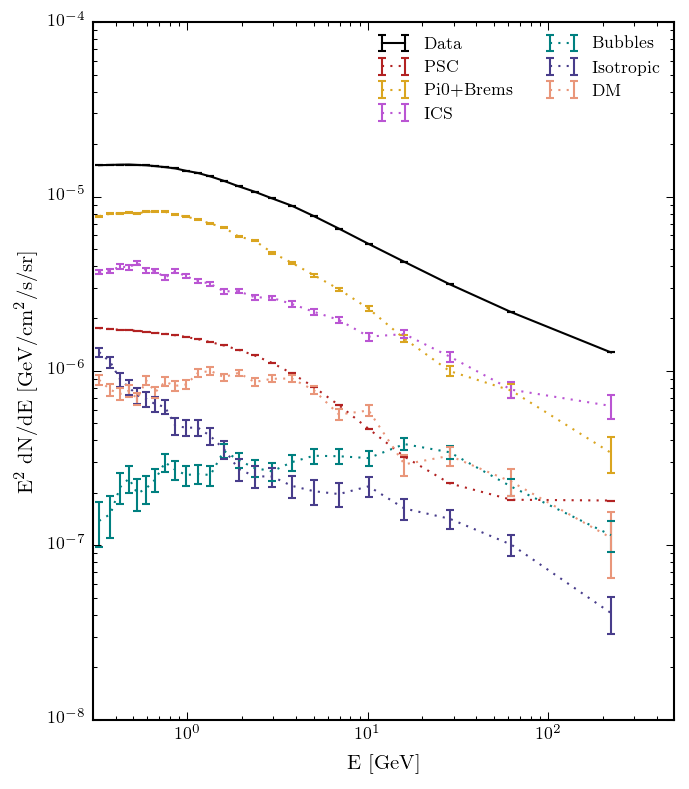

In [95]:
import Template
import Tools, healpy
reload(Tools)


#print np.array(A.m.matrix()).shape

#print A.templateList['DM'].valueError/A.templateList['DM'].value


plt.figure(figsize=(5,6))
def PlotComponent(name):
    E, flux, stat = A.GetSpectrum(name)
    #if stat
    if name is 'Data':
        plt.errorbar(E/1e3,E**2*flux/1e3,E**2*stat.T/1e3, label=name.replace('_','+'),
                     capthick=1, capsize=2, ls='-',c='k')
    else:
        plt.errorbar(E/1e3,E**2*flux/1e3,E**2*stat.T/1e3, label=name.replace('_','+'),capthick=1, capsize=2, ls=':' )
    
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    
PlotComponent('Data')    
PlotComponent('PSC')
PlotComponent('Pi0_Brems')
PlotComponent('ICS')
PlotComponent('Bubbles')
PlotComponent('Isotropic')
PlotComponent('DM')

# linthresh=1e-8
# plt.yscale('symlog', linthreshy=linthresh, subsy=np.arange(0,10),linscaley=0.1)
# plt.ylim(-1e-6,1e-4)

plt.legend(frameon=False, fontsize=8,ncol=2)
#plt.ylim(1e-8,4e-4)
plt.xlim(.3,500)


#A.SaveSpectra('./mod_c/spec_ModA_P7_XCO.pickle') # 3FGL with ext XCO fitted 
# A.SaveSpectra('./mod_c/spec_ModA_P7_XCO_2FGL.pickle') # 2FGL no ext XCO fitted 
#A.SaveSpectra('./mod_c/spec_ModA_P7_MS04.pickle') # 2FGL no ext XCO fixed
#A.SaveSpectra('./mod_c/spec_base_3D.pickle') # 2FGL no ext XCO fixed
#A.SaveSpectra('./mod_c/spec_Mod_C_3D.pickle') # 2FGL no ext XCO fixed
A.SaveSpectra('./mod_c/spec_Mod_A_2D_MS04_XCO_P7.pickle') # 2FGL no ext XCO fixed
#A.SaveSpectra('./mod_c/spec_Mod_A_2D_MS04_XCO_P8.pickle') # 2FGL no ext XCO fixed

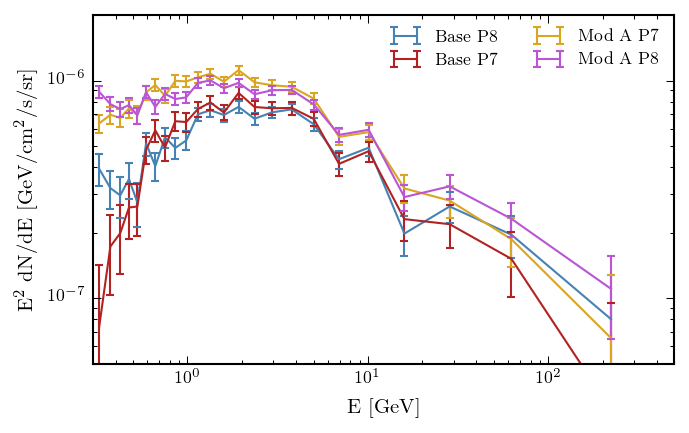

In [99]:
plt.figure(figsize=(5,3))
def PlotComponentFromFile(name, filename,label=''):
    E, flux, stat = pickle.load(open(filename))[name] # A.GetSpectrum(name)
    #if stat
    if name is 'Data':
        plt.errorbar(E/1e3,E**2*flux/1e3,E**2*stat.T/1e3, label=label,
                     capthick=1, capsize=2, ls='-',c='k')
    else:
        plt.errorbar(E/1e3,E**2*flux/1e3,E**2*stat.T/1e3, label=label,capthick=1, capsize=2, ls='-' )
    
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    
    
PlotComponentFromFile('DM','./mod_c/spec_Mod_A_2D_MS04_z6_Yus_P8.pickle', label='Base P8')
PlotComponentFromFile('DM','./mod_c/spec_Mod_A_2D_MS04_z6_Yus_P7.pickle', label='Base P7')
PlotComponentFromFile('DM','./mod_c/spec_Mod_A_2D_MS04_XCO_P7.pickle', label='Mod A P7')
PlotComponentFromFile('DM','./mod_c/spec_Mod_A_2D_MS04_XCO_P8.pickle', label='Mod A P8')
#Mod_A_2D_MS04_XCO

plt.legend(frameon=False, fontsize=8,ncol=2)
plt.ylim(5e-8,2e-6)
plt.xlim(.3,500)

plt.savefig('/home/carlson/Dropbox/GCE_H2_Sources/plots/p7_vs_p8_GCE.pdf',bbox_inches='tight')